In [73]:
# Importing Essential Libraries
import numpy as np
import cv2

import PIL.Image as Image
import os
import matplotlib.pylab as plt

import tensorflow as tf 
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [74]:
# Importing mobilenet v2 Classification model TensorFlow Hub and creating the classifier.
image_shape = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = image_shape+(3,))
])

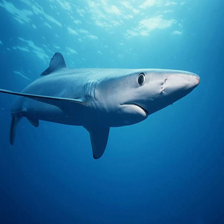

In [76]:
shark_fish = Image.open('/content/shark.jpg').resize(image_shape)
shark_fish

In [77]:
# Normalizing
shark_fish = np.array(shark_fish)/255.0
shark_fish.shape

(224, 224, 3)

In [78]:
shark_fish

array([[[0.09411765, 0.49803922, 0.6745098 ],
        [0.10196078, 0.51372549, 0.69019608],
        [0.16078431, 0.58431373, 0.75686275],
        ...,
        [0.20392157, 0.6       , 0.77254902],
        [0.19215686, 0.58823529, 0.76078431],
        [0.18823529, 0.58431373, 0.75686275]],

       [[0.09803922, 0.50196078, 0.68235294],
        [0.09411765, 0.50980392, 0.68235294],
        [0.10980392, 0.5372549 , 0.70588235],
        ...,
        [0.19607843, 0.59215686, 0.76862745],
        [0.19215686, 0.58823529, 0.76078431],
        [0.18823529, 0.58431373, 0.75686275]],

       [[0.12941176, 0.54117647, 0.71764706],
        [0.09411765, 0.51764706, 0.68627451],
        [0.11372549, 0.54509804, 0.71372549],
        ...,
        [0.19215686, 0.58823529, 0.76078431],
        [0.18823529, 0.58431373, 0.75686275],
        [0.18823529, 0.58431373, 0.75686275]],

       ...,

       [[0.        , 0.1254902 , 0.30980392],
        [0.        , 0.1254902 , 0.30980392],
        [0.00392157, 0

In [79]:
shark = shark_fish[np.newaxis,...]

Make prediction with trained model (mobilenet v2)

In [80]:
prediction = classifier.predict(shark)
prediction.shape

(1, 1001)

In [81]:
prediction_label_index = np.argmax(prediction)
prediction_label_index

3

In [117]:
image_labels = []
with open ("/content/ImageNetlabels.txt", "r") as file:
  image_labels = file.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [83]:
image_labels[prediction_label_index]

'great white shark'

### Flower Classification:

In [84]:
# Loading data.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir = '.', untar=True)


In [85]:
import pathlib
data_dir = pathlib.Path(dataset_dir)
data_dir

PosixPath('datasets/flower_photos')

In [86]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/2609353769_dc3654f12f.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg')]

In [87]:
# Counting Image 
count = len(list(data_dir.glob('*/*')))
print(count)

3670


In [88]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/2609353769_dc3654f12f.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg')]

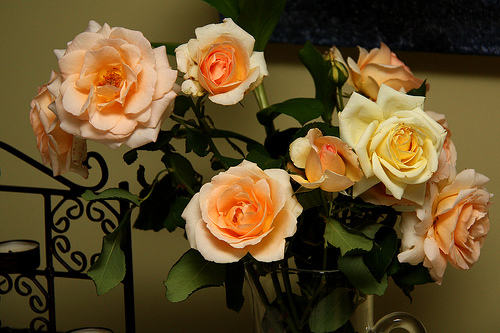

In [89]:
 # Opening Image:
 from PIL import Image
 Image.open(str(roses[10]))

In [90]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:3]

[PosixPath('datasets/flower_photos/tulips/7082608511_f4cf233f59_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14866400927_3a59899df3_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/17224410762_402455ed8f.jpg')]

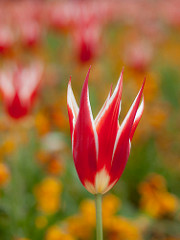

In [91]:
Image.open(str(tulips[1]))

Making dictionary, so that the key is the name of the flowers name and value is list of images.

In [92]:
flower_img = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflower/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [93]:
flower_labels = {
    'roses': 0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [94]:
flower_img['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/2609353769_dc3654f12f.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg')]

In [95]:
str(flower_img['tulips'][0])

'datasets/flower_photos/tulips/7082608511_f4cf233f59_n.jpg'

In [96]:
img = cv2.imread(str(flower_img['tulips'][0]))
img.shape

(213, 320, 3)

In [97]:
# Resizing Images:
cv2.resize(img,image_shape).shape

(224, 224, 3)

In [98]:
# Resizing all images 
x,y = [],[]

for flowers_name, images in flower_img.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, image_shape)
    x.append(resized_img) 
    y.append(flower_labels[flowers_name])

In [99]:
x = np.array(x)
y = np.array(y)

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(x,y, random_state=0)

In [101]:
# Normalizing 
x_train_nor = x_train / 255
x_test_nor = x_test / 255

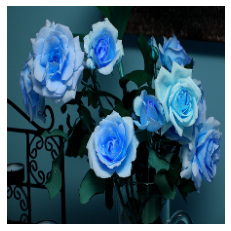

In [102]:
plt.axis('off')
plt.imshow(x[10]);

Make Prediction using trained (mobilenet v2) model.

In [103]:
prediction = classifier.predict(np.array([x[0],x[1],x[2]]))
prediction = np.argmax(prediction,axis=1)
prediction

array([722, 795, 795])

In [104]:
image_labels[795]

'shower curtain'

#### Re-training Model:

In [110]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3), trainable=False)



In [112]:
num_of_flowers = 5

model = tf.keras.Sequential([
          pretrained_model_without_top_layer,
          tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_15 (Dense)            (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [116]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc'])
model.fit(x_train_nor, y_train, epochs =5)

Epoch 1/5
70/70 [==============================] - 60s 803ms/step - loss: 0.6578 - acc: 0.7388
Epoch 2/5
70/70 [==============================] - 58s 822ms/step - loss: 0.3188 - acc: 0.8927
Epoch 3/5
70/70 [==============================] - 56s 799ms/step - loss: 0.2529 - acc: 0.9174
Epoch 4/5
70/70 [==============================] - 56s 804ms/step - loss: 0.2083 - acc: 0.9336
Epoch 5/5
70/70 [==============================] - 56s 806ms/step - loss: 0.1832 - acc: 0.9457


In [119]:
model.evaluate(x_test_nor, y_test)

24/24 [==============================] - 20s 784ms/step - loss: 0.3429 - acc: 0.8721


[0.34291380643844604, 0.8721399903297424]